In [ ]:
# install
!pip install pytorch-pretrained-bert pytorch-nlp

In [ ]:
# BERT imports
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from pytorch_pretrained_bert import BertTokenizer, BertConfig
from pytorch_pretrained_bert import BertAdam, BertForSequenceClassification
from tqdm import tqdm, trange
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [ ]:
# specify GPU device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
n_gpu = torch.cuda.device_count()

In [ ]:
# verify GPU availability
import tensorflow as tf

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving new_data.csv to new_data.csv


In [ ]:
df = pd.read_csv('new_data.csv')
df.head()

,Id,Enunciado,Tópico,Contexto,English
0,994,Meu primeiro programa\nEscreva um programa que...,Ambientação,Outros,"""My first show\nWrite a program that prints th..."
1,996,Impressão de caracteres na tela\nEscreva um pr...,Ambientação,Outros,\nScreen character printing\nWrite a program t...
2,999,Impressão de caracteres na tela (Bart Simpson)...,Ambientação,Outros,\nScreen Character Printing (Bart Simpson)\nWr...
3,1000,Operadores aritméticos\nQual o valor de X para...,Ambientação,Matemático,\nArithmetic Operators\nWhat is the value of X...
4,578,Operadores aritméticos \nQual o valor de Y par...,Ambientação,Matemático,\nArithmetic Operators\nWhat is the value of Y...


In [ ]:
df.English = df.English.str.replace('\n', ' ')

In [ ]:
X = df.English
y = df.Tópico

In [ ]:
def transform(lista):
  retorno=[]
  for elemento in lista:
    if(elemento=='Ambientação'):
      retorno+=[0]
    elif(elemento=='Estrutura condicional composta'):
      retorno+=[1]
    elif(elemento=='Estrutura condicional encadeada'):
      retorno+=[2]
    elif(elemento=='Estrutura de repetição por condição'):
      retorno+=[3]
    elif(elemento=='Estrutura de repetição por contagem'):
      retorno+=[4]
    elif(elemento=='Matrizes'):
      retorno+=[5]
    elif(elemento=='Strings'):
      retorno+=[6]
    elif(elemento=='Variáveis e Estrutura Sequencial'):
      retorno+=[7]
    elif(elemento=='Vetor'):
      retorno+=[8]
  return retorno

def reverseTransform(lista):
  retorno=[]
  for elemento in lista:
    if(elemento==0):
      retorno+=['Ambientação']
    elif(elemento==1):
      retorno+=['Estrutura condicional composta']
    elif(elemento==2):
      retorno+=['Estrutura condicional encadeada']
    elif(elemento==3):
      retorno+=['Estrutura de repetição por condição']
    elif(elemento==4):
      retorno+=['Estrutura de repetição por contagem']
    elif(elemento==5):
      retorno+=['Matrizes']
    elif(elemento==6):
      retorno+=['Strings']
    elif(elemento==7):
      retorno+=['Variáveis e Estrutura Sequencial']
    elif(elemento==8):
      retorno+=['Vetor']
  return retorno

In [ ]:
from sklearn.model_selection import StratifiedKFold
vetor_X_train=[]
vetor_y_train=[]
vetor_X_test=[]
vetor_y_test=[]
split = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
for train_index, val_index in split.split(X,y):
    vetor_X_train+=[X.iloc[train_index]]
    vetor_X_test+=[X.iloc[val_index]]
    vetor_y_train+=[y[train_index]]
    vetor_y_test+=[y[val_index]]

In [ ]:
contador=0
y_pred=[]
y_test=[]
# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=y.shape[0])
model.cuda()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): BertLayerNorm()
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): BertLayerNorm()
              (dropout): Dropout(p=0.1, inplace=False)
   

t_total value of -1 results in schedule not being applied
Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Train loss: 4.503237255414327


Epoch:  25%|██▌       | 1/4 [00:15<00:47, 15.71s/it]

Validation Accuracy: 0.3098958333333333
Train loss: 1.8033304929733276


Epoch:  50%|█████     | 2/4 [00:31<00:31, 15.60s/it]

Validation Accuracy: 0.71875
Train loss: 0.941180698076884


Epoch:  75%|███████▌  | 3/4 [00:46<00:15, 15.54s/it]

Validation Accuracy: 0.8359375
Train loss: 0.46607196182012556


Epoch: 100%|██████████| 4/4 [01:01<00:00, 15.47s/it]

Validation Accuracy: 0.8359375


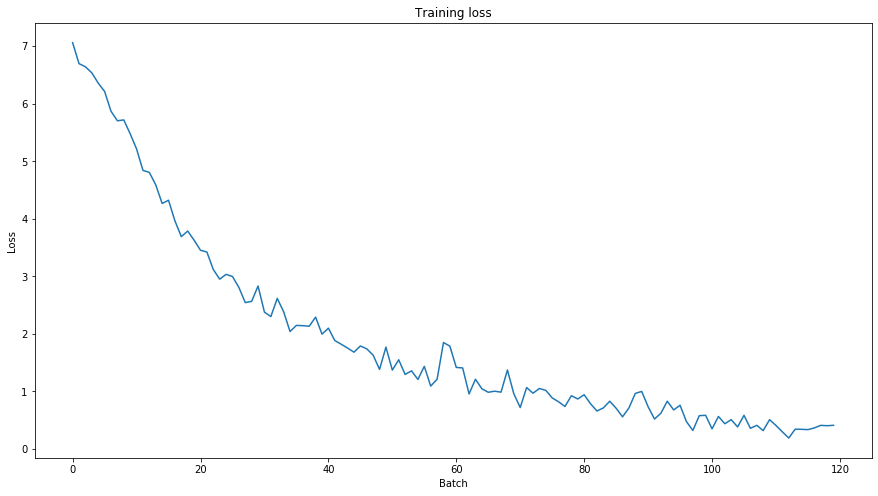

t_total value of -1 results in schedule not being applied
Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Train loss: 4.527348915735881


Epoch:  25%|██▌       | 1/4 [00:15<00:46, 15.45s/it]

Validation Accuracy: 0.3142361111111111
Train loss: 1.9233413736025493


Epoch:  50%|█████     | 2/4 [00:30<00:30, 15.45s/it]

Validation Accuracy: 0.5850694444444444
Train loss: 0.985179661711057


Epoch:  75%|███████▌  | 3/4 [00:46<00:15, 15.43s/it]

Validation Accuracy: 0.8550347222222222
Train loss: 0.47142327229181924


Epoch: 100%|██████████| 4/4 [01:01<00:00, 15.42s/it]

Validation Accuracy: 0.8472222222222222


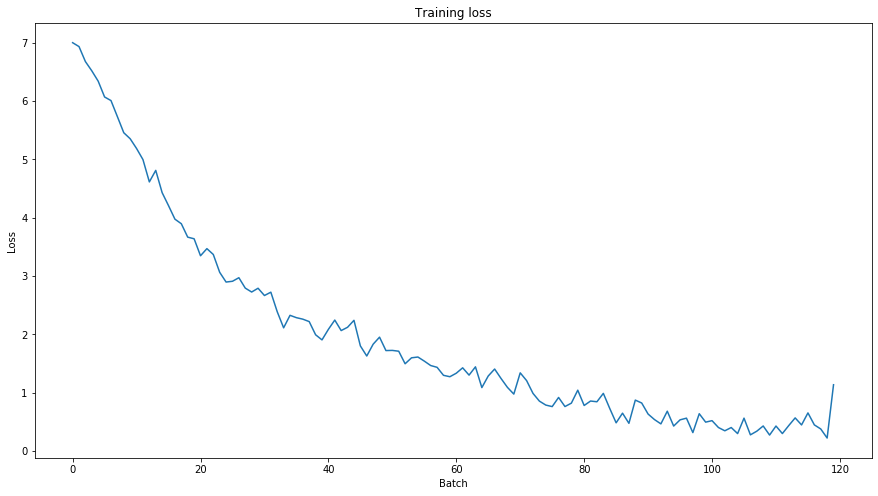

t_total value of -1 results in schedule not being applied
Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Train loss: 4.327893185615539


Epoch:  25%|██▌       | 1/4 [00:15<00:46, 15.35s/it]

Validation Accuracy: 0.2708333333333333
Train loss: 1.6531180640061696


Epoch:  50%|█████     | 2/4 [00:30<00:30, 15.35s/it]

Validation Accuracy: 0.7456597222222222
Train loss: 0.7290758192539215


Epoch:  75%|███████▌  | 3/4 [00:46<00:15, 15.35s/it]

Validation Accuracy: 0.8394097222222222
Train loss: 0.40064737051725385


Epoch: 100%|██████████| 4/4 [01:01<00:00, 15.37s/it]

Validation Accuracy: 0.8272569444444444


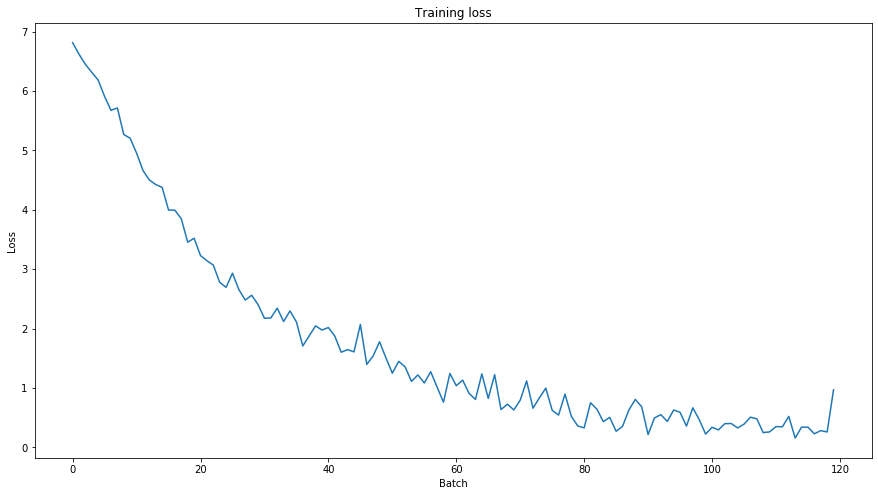

t_total value of -1 results in schedule not being applied
Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Train loss: 4.620491925875346


Epoch:  25%|██▌       | 1/4 [00:15<00:46, 15.39s/it]

Validation Accuracy: 0.30729166666666663
Train loss: 2.0413565079371137


Epoch:  50%|█████     | 2/4 [00:30<00:30, 15.35s/it]

Validation Accuracy: 0.5607638888888888
Train loss: 1.2600345929463705


Epoch:  75%|███████▌  | 3/4 [00:45<00:15, 15.34s/it]

Validation Accuracy: 0.6831597222222222
Train loss: 0.7175129155317942


Epoch: 100%|██████████| 4/4 [01:01<00:00, 15.37s/it]

Validation Accuracy: 0.7925347222222222


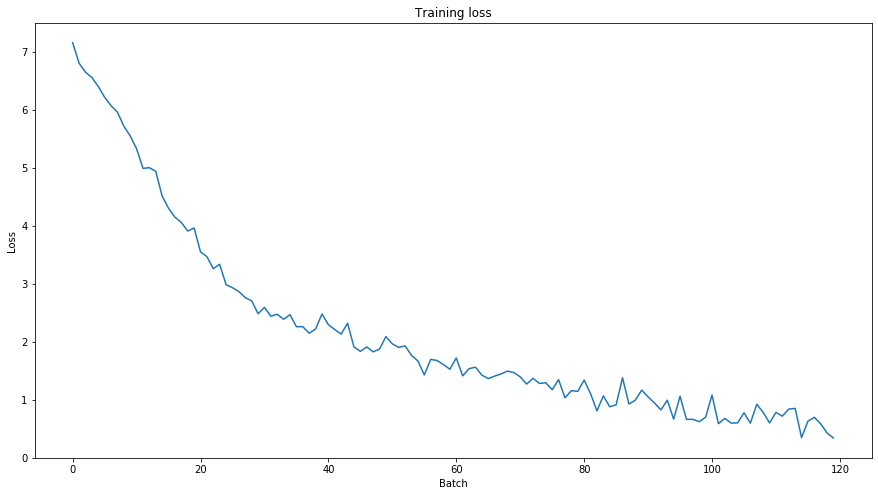

t_total value of -1 results in schedule not being applied
Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Train loss: 4.516351668039958


Epoch:  25%|██▌       | 1/4 [00:15<00:46, 15.35s/it]

Validation Accuracy: 0.2421875
Train loss: 1.7540388266245523


Epoch:  50%|█████     | 2/4 [00:30<00:30, 15.36s/it]

Validation Accuracy: 0.6388888888888888
Train loss: 0.8550419708093008


Epoch:  75%|███████▌  | 3/4 [00:46<00:15, 15.36s/it]

Validation Accuracy: 0.8784722222222222
Train loss: 0.43859441528717674


Epoch: 100%|██████████| 4/4 [01:01<00:00, 15.37s/it]

Validation Accuracy: 0.8706597222222222


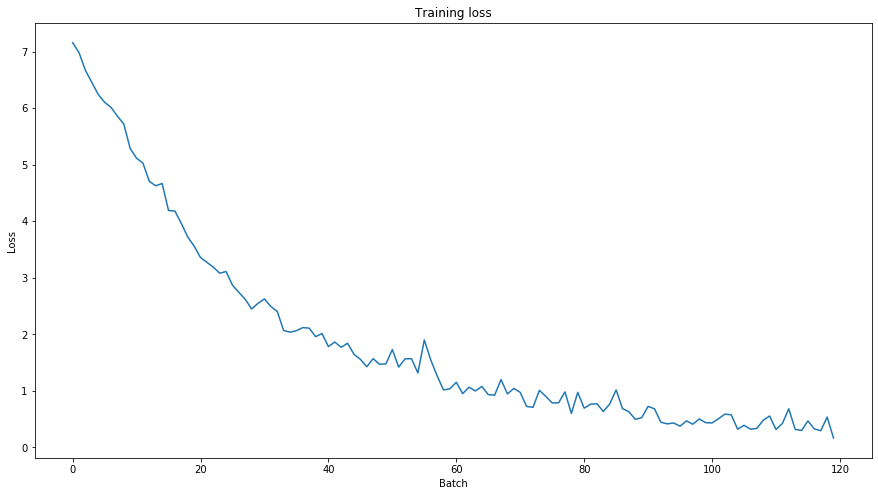

t_total value of -1 results in schedule not being applied
Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Train loss: 4.486598475774129


Epoch:  25%|██▌       | 1/4 [00:15<00:46, 15.42s/it]

Validation Accuracy: 0.2734375
Train loss: 1.6653867920239767


Epoch:  50%|█████     | 2/4 [00:30<00:30, 15.40s/it]

Validation Accuracy: 0.703125
Train loss: 0.877286970615387


Epoch:  75%|███████▌  | 3/4 [00:46<00:15, 15.41s/it]

Validation Accuracy: 0.734375
Train loss: 0.47290006826321285


Epoch: 100%|██████████| 4/4 [01:01<00:00, 15.44s/it]

Validation Accuracy: 0.84375


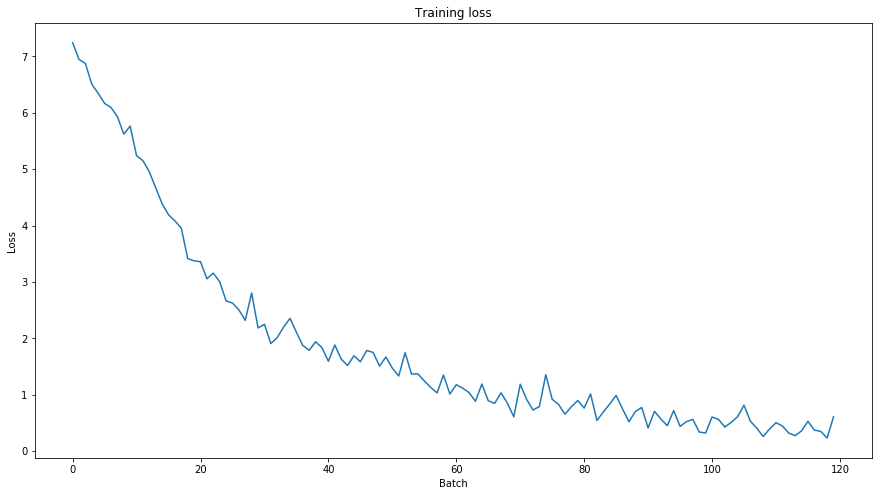

t_total value of -1 results in schedule not being applied
Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Train loss: 4.560264213879903


Epoch:  25%|██▌       | 1/4 [00:15<00:46, 15.36s/it]

Validation Accuracy: 0.2109375
Train loss: 1.8222463687260946


Epoch:  50%|█████     | 2/4 [00:30<00:30, 15.34s/it]

Validation Accuracy: 0.671875
Train loss: 0.8885912994543711


Epoch:  75%|███████▌  | 3/4 [00:45<00:15, 15.33s/it]

Validation Accuracy: 0.8515625
Train loss: 0.47448570728302003


Epoch: 100%|██████████| 4/4 [01:01<00:00, 15.35s/it]

Validation Accuracy: 0.8515625


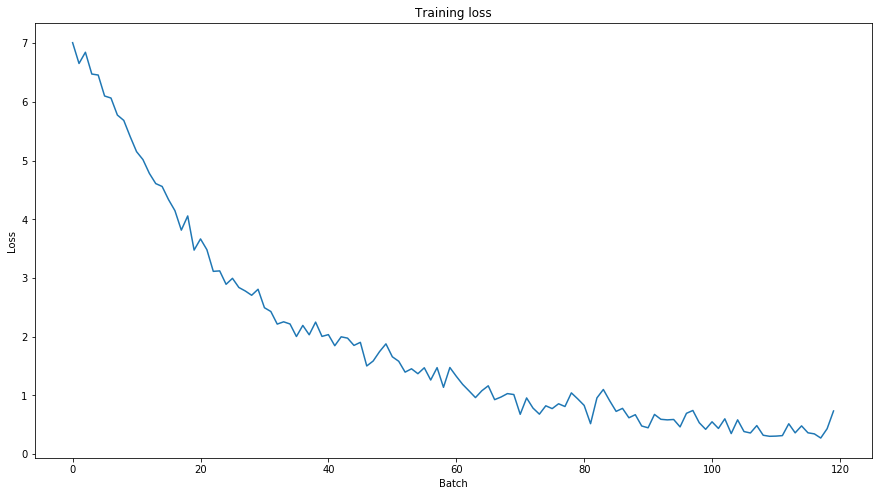

t_total value of -1 results in schedule not being applied
Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Train loss: 4.575693448384603


Epoch:  25%|██▌       | 1/4 [00:15<00:46, 15.45s/it]

Validation Accuracy: 0.1953125
Train loss: 2.117974857489268


Epoch:  50%|█████     | 2/4 [00:30<00:30, 15.45s/it]

Validation Accuracy: 0.578125
Train loss: 1.2924371004104613


Epoch:  75%|███████▌  | 3/4 [00:46<00:15, 15.41s/it]

Validation Accuracy: 0.7265625
Train loss: 0.6413327664136886


Epoch: 100%|██████████| 4/4 [01:01<00:00, 15.41s/it]

Validation Accuracy: 0.875


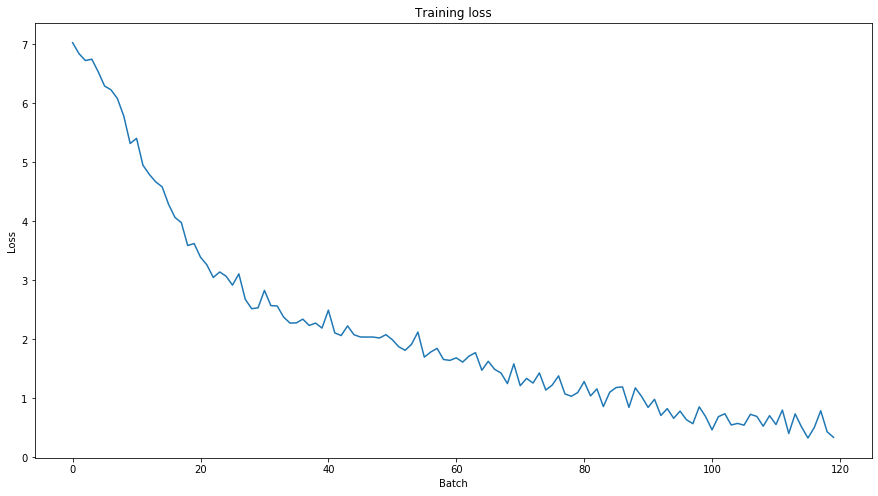

t_total value of -1 results in schedule not being applied
Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Train loss: 4.390664720535279


Epoch:  25%|██▌       | 1/4 [00:15<00:46, 15.45s/it]

Validation Accuracy: 0.34375
Train loss: 1.7867283622423809


Epoch:  50%|█████     | 2/4 [00:30<00:30, 15.43s/it]

Validation Accuracy: 0.734375
Train loss: 0.8395980884631474


Epoch:  75%|███████▌  | 3/4 [00:46<00:15, 15.40s/it]

Validation Accuracy: 0.8046875
Train loss: 0.37805328369140623


Epoch: 100%|██████████| 4/4 [01:01<00:00, 15.39s/it]

Validation Accuracy: 0.8515625


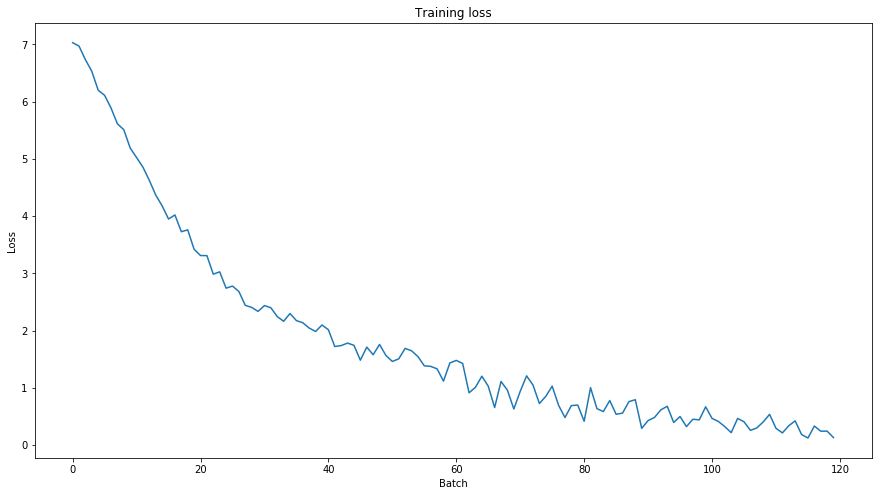

t_total value of -1 results in schedule not being applied
Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Train loss: 4.546268081665039


Epoch:  25%|██▌       | 1/4 [00:15<00:46, 15.46s/it]

Validation Accuracy: 0.2109375
Train loss: 2.056460722287496


Epoch:  50%|█████     | 2/4 [00:30<00:30, 15.44s/it]

Validation Accuracy: 0.4140625
Train loss: 1.2680951615174612


Epoch:  75%|███████▌  | 3/4 [00:46<00:15, 15.40s/it]

Validation Accuracy: 0.6953125
Train loss: 0.792036963502566


Epoch: 100%|██████████| 4/4 [01:01<00:00, 15.37s/it]

Validation Accuracy: 0.6796875


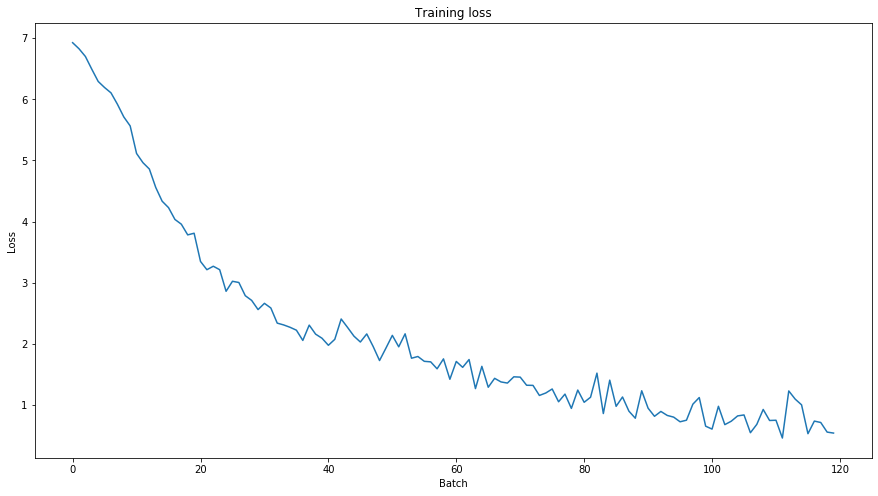

In [ ]:
contador=0
y_pred=[]
y_test=[]
while(contador<len(vetor_X_train)):
    query_data_train=vetor_X_train[contador]
    labels=vetor_y_train[contador]
    labels=transform(labels)
    query_data_test=vetor_X_test[contador]
    intent_data_label_test=vetor_y_test[contador]
    intent_data_label_test=transform(intent_data_label_test)

    sentences = ["[CLS] " + query + " [SEP]" for query in query_data_train]
    sentences2=["[CLS] " + query + " [SEP]" for query in query_data_test]
    
    # Tokenize with BERT tokenizer
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
    tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]

    tokenizer2 = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
    tokenized_texts2 = [tokenizer2.tokenize(sent) for sent in sentences2]
  
    # Set the maximum sequence length. 
    MAX_LEN = 128
    # Pad our input tokens
    train_inputs = pad_sequences([tokenizer.convert_tokens_to_ids(txt) for txt in tokenized_texts],
                              maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
    # Use the BERT tokenizer to convert the tokens to their index numbers in the BERT vocabulary
    train_inputs = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
    train_inputs = pad_sequences(train_inputs, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

    # Pad our input tokens
    validation_inputs = pad_sequences([tokenizer2.convert_tokens_to_ids(txt) for txt in tokenized_texts2],
                              maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
    # Use the BERT tokenizer to convert the tokens to their index numbers in the BERT vocabulary
    validation_inputs = [tokenizer2.convert_tokens_to_ids(x) for x in tokenized_texts2]
    validation_inputs = pad_sequences(validation_inputs, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

    # # Create attention masks
    attention_masks = []
    # Create a mask of 1s for each token followed by 0s for padding
    for seq in train_inputs:
      seq_mask = [float(i>0) for i in seq]
      attention_masks.append(seq_mask)

    attention_masks2 = []
    # Create a mask of 1s for each token followed by 0s for padding
    for seq in validation_inputs:
      seq_mask = [float(i>0) for i in seq]
      attention_masks2.append(seq_mask)


    # # Use train_test_split to split our data into train and validation sets for training
    # train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels,
    #                                                             random_state=2018, test_size=0.1)
    # train_masks, validation_masks, _, _ = train_test_split(attention_masks, input_ids,
    #                                             random_state=2018, test_size=0.1)

    # # Convert all of our data into torch tensors, the required datatype for our model
    train_inputs = torch.tensor(train_inputs)
    validation_inputs = torch.tensor(validation_inputs)
    train_labels = torch.tensor(labels)
    validation_labels = torch.tensor(intent_data_label_test)
    train_masks = torch.tensor(attention_masks)
    validation_masks = torch.tensor(attention_masks2)

    # Select a batch size for training. 
    batch_size = 32

    # Create an iterator of our data with torch DataLoader 
    train_data = TensorDataset(train_inputs, train_masks, train_labels)
    train_sampler = RandomSampler(train_data)
    train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
    validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
    validation_sampler = SequentialSampler(validation_data)
    validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

    model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=y.shape[0])
    model.cuda()

    # BERT fine-tuning parameters
    param_optimizer = list(model.named_parameters())
    no_decay = ['bias', 'gamma', 'beta']
    optimizer_grouped_parameters = [
        {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
        'weight_decay_rate': 0.01},
        {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
        'weight_decay_rate': 0.0}
    ]

    optimizer = BertAdam(optimizer_grouped_parameters,
                        lr=2e-5,
                        warmup=.1)

      
    # Store our loss and accuracy for plotting
    train_loss_set = []
    # Number of training epochs 
    epochs = 4

    # BERT training loop
    for _ in trange(epochs, desc="Epoch"):  
      
      ## TRAINING
      
      # Set our model to training mode
      model.train()  
      # Tracking variables
      tr_loss = 0
      nb_tr_examples, nb_tr_steps = 0, 0
      # Train the data for one epoch
      for step, batch in enumerate(train_dataloader):
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        # Clear out the gradients (by default they accumulate)
        optimizer.zero_grad()
        # Forward pass
        loss = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
        train_loss_set.append(loss.item())    
        # Backward pass
        loss.backward()
        # Update parameters and take a step using the computed gradient
        optimizer.step()
        # Update tracking variables
        tr_loss += loss.item()
        nb_tr_examples += b_input_ids.size(0)
        nb_tr_steps += 1
      print("Train loss: {}".format(tr_loss/nb_tr_steps))
          
      ## VALIDATION

      # Put model in evaluation mode
      model.eval()
      # Tracking variables 
      eval_loss, eval_accuracy = 0, 0
      nb_eval_steps, nb_eval_examples = 0, 0
      # Evaluate data for one epoch
      for batch in validation_dataloader:
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        # Telling the model not to compute or store gradients, saving memory and speeding up validation
        with torch.no_grad():
          # Forward pass, calculate logit predictions
          logits = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)    
        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)    
        eval_accuracy += tmp_eval_accuracy
        nb_eval_steps += 1
      print("Validation Accuracy: {}".format(eval_accuracy/nb_eval_steps))

    # plot training performance
    plt.figure(figsize=(15,8))
    plt.title("Training loss")
    plt.xlabel("Batch")
    plt.ylabel("Loss")
    plt.plot(train_loss_set)
    plt.show()

    # load test data
    sentences = ["[CLS] " + query + " [SEP]" for query in query_data_test]
    labels = intent_data_label_test

    # tokenize test data
    tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]
    MAX_LEN = 128
    # Pad our input tokens
    input_ids = pad_sequences([tokenizer.convert_tokens_to_ids(txt) for txt in tokenized_texts],
                              maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
    # Use the BERT tokenizer to convert the tokens to their index numbers in the BERT vocabulary
    input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
    input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
    # Create attention masks
    attention_masks = []
    # Create a mask of 1s for each token followed by 0s for padding
    for seq in input_ids:
      seq_mask = [float(i>0) for i in seq]
      attention_masks.append(seq_mask) 

    # create test tensors
    prediction_inputs = torch.tensor(input_ids)
    prediction_masks = torch.tensor(attention_masks)
    prediction_labels = torch.tensor(labels)
    batch_size = 32  
    prediction_data = TensorDataset(prediction_inputs, prediction_masks, prediction_labels)
    prediction_sampler = SequentialSampler(prediction_data)
    prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

    ## Prediction on test set
    # Put model in evaluation mode
    model.eval()
    # Tracking variables 
    predictions , true_labels = [], []
    # Predict 
    for batch in prediction_dataloader:
      # Add batch to GPU
      batch = tuple(t.to(device) for t in batch)
      # Unpack the inputs from our dataloader
      b_input_ids, b_input_mask, b_labels = batch
      # Telling the model not to compute or store gradients, saving memory and speeding up prediction
      with torch.no_grad():
        # Forward pass, calculate logit predictions
        logits = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
      # Move logits and labels to CPU
      logits = logits.detach().cpu().numpy()
      label_ids = b_labels.to('cpu').numpy()  
      # Store predictions and true labels
      predictions.append(logits)
      true_labels.append(label_ids)
      
    # Import and evaluate each test batch using Matthew's correlation coefficient
    from sklearn.metrics import matthews_corrcoef
    matthews_set = []
    for i in range(len(true_labels)):
      matthews = matthews_corrcoef(true_labels[i],
                    np.argmax(predictions[i], axis=1).flatten())
      matthews_set.append(matthews)
      
    # Flatten the predictions and true values for aggregate Matthew's evaluation on the whole dataset
    flat_predictions = [item for sublist in predictions for item in sublist]
    flat_predictions = np.argmax(flat_predictions, axis=1).flatten()
    flat_true_labels = [item for sublist in true_labels for item in sublist]

    y_pred+=[flat_predictions]
    y_test+=[flat_true_labels]
        


    contador+=1

In [ ]:
aux=[]
for elemento in y_pred:
  for cada in elemento:
    aux+=[cada]
y_pred=aux

In [ ]:
aux=[]
for elemento in y_test:
  for cada in elemento:
    aux+=[cada]
y_test=aux

In [ ]:
y_test=reverseTransform(y_test)
y_pred=reverseTransform(y_pred)

In [ ]:

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))#, target_names=target_names))

                                     precision    recall  f1-score   support

                        Ambientação       1.00      0.05      0.10        19
     Estrutura condicional composta       0.72      0.76      0.74       136
    Estrutura condicional encadeada       0.96      0.83      0.89       161
Estrutura de repetição por condição       0.78      0.76      0.77       114
Estrutura de repetição por contagem       0.75      0.68      0.71       117
                           Matrizes       0.97      0.97      0.97       134
                            Strings       0.79      0.79      0.79        47
   Variáveis e Estrutura Sequencial       0.74      0.87      0.80       157
                              Vetor       0.84      0.93      0.88       160

                           accuracy                           0.82      1045
                          macro avg       0.84      0.74      0.74      1045
                       weighted avg       0.83      0.82      0.81      10

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred, y_test)

0.8210526315789474

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving arq.txt to arq.txt


In [ ]:
def get_new_sentences(da):
    strings=[]
    for elemento in da['English']:
        if(len(da)+len(strings)<maximum):
            contador=0
            lista=elemento.split()
            while(contador<len(lista)):
                if(lista[contador] in synonyms_lexicon):
                    lista[contador]=synonyms_lexicon[lista[contador]][0]
                contador+=1
            strings+=[' '.join(lista)]
        else:
            break

    new_sentences = pd.Series(strings)
    return new_sentences

def get_synonyms_lexicon(path):
    synonyms_lexicon = {}
    text_entries = [l.strip() for l in open(path).readlines()]
    for e in text_entries:
        e = e.split(' ')
        k = e[0]
        v = e[1:len(e)]
        synonyms_lexicon[k] = v
    return synonyms_lexicon

synonyms_lexicon = get_synonyms_lexicon('arq.txt')

In [ ]:
from sklearn.model_selection import StratifiedKFold
vetor_X_train=[]
vetor_y_train=[]
vetor_X_test=[]
vetor_y_test=[]
split = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
for train_index, val_index in split.split(X, y):
    vetor_X_train+=[X.iloc[train_index]]
    vetor_X_test+=[X.iloc[val_index]]
    vetor_y_train+=[y[train_index]]
    vetor_y_test+=[y[val_index]]

In [ ]:
contador=0
y_pred=[]
y_test=[]
while(contador<len(vetor_X_train)):
    
    query_data_test=vetor_X_test[contador]
    intent_data_label_test=vetor_y_test[contador]
    intent_data_label_test=transform(intent_data_label_test)
    

    X_train=vetor_X_train[contador]
    y_train=vetor_y_train[contador]
    test = np.c_[X_train[:np.newaxis], y_train[:np.newaxis]]
    df = pd.DataFrame(test, columns=['English', 'Tópico'])
    
   # maximum = classe com maior quantidade de problemas(classe majoritaria) = mathematics

    maximum = df.Tópico.value_counts().max()

    # Separação de cada problemas em suas respectivas classes
    g = df.groupby('Tópico')

    ece = g.get_group('Estrutura condicional encadeada')
#     ec=g.get_group('Estrutura condicional')
    vetor = g.get_group('Vetor')
    ves = g.get_group('Variáveis e Estrutura Sequencial')
    ecc = g.get_group('Estrutura condicional composta')
    matrizes = g.get_group('Matrizes')
    ercont = g.get_group('Estrutura de repetição por contagem')
    ercond = g.get_group('Estrutura de repetição por condição')
    strings = g.get_group('Strings')
    ambientacao = g.get_group('Ambientação')
    
    #criação de novas sentenças

    new_ece = get_new_sentences(ece)
    new_vetor = get_new_sentences(vetor)
    new_ves = get_new_sentences(ves)
    new_ecc = get_new_sentences(ecc)
    new_matrizes = get_new_sentences(matrizes)
    new_ercond = get_new_sentences(ercond)
    new_ercont = get_new_sentences(ercont)
    new_strings = get_new_sentences(strings)
    new_ambientacao = get_new_sentences(ambientacao)

    
    #criando dataframe de cada sentença criada

    new_ece = pd.DataFrame(new_ece,columns=['English'])
    new_ece['Tópico'] = 'Estrutura condicional'

    new_vetor = pd.DataFrame(new_vetor,columns=['English'])
    new_vetor['Tópico'] = 'Vetor'

    new_ves = pd.DataFrame(new_ves,columns=['English'])
    new_ves['Tópico'] = 'Variáveis e Estrutura Sequencial'

    new_ecc = pd.DataFrame(new_ecc,columns=['English'])
    new_ecc['Tópico'] = 'Estrutura condicional composta'

    new_matrizes = pd.DataFrame(new_matrizes,columns=['English'])
    new_matrizes['Tópico'] = 'Matrizes'

    new_ercont = pd.DataFrame(new_ercont,columns=['English'])
    new_ercont['Tópico'] = 'Estrutura de repetição por contagem'

    new_ercond = pd.DataFrame(new_ercond,columns=['English'])
    new_ercond['Tópico'] = 'Estrutura de repetição por condição'

    new_strings = pd.DataFrame(new_strings,columns=['English'])
    new_strings['Tópico'] = 'Strings'

    new_ambientacao = pd.DataFrame(new_ambientacao,columns=['English'])
    new_ambientacao['Tópico'] = 'Ambientação'

    ece_extended = pd.concat([ece, new_ece], keys = ['English', 'Tópico'])
    vetor_extended = pd.concat([vetor, new_vetor], keys = ['English', 'Tópico'])
    ves_extended = pd.concat([ves, new_ves], keys = ['English', 'Tópico'])
    ecc_extended = pd.concat([ecc, new_ecc], keys = ['English', 'Tópico'])
    matrizes_extended = pd.concat([matrizes, new_matrizes], keys = ['English', 'Tópico'])
    ercont_extended = pd.concat([ercont, new_ercont], keys = ['English', 'Tópico'])
    ercond_extended = pd.concat([ercond, new_ercond], keys = ['English', 'Tópico'])
    strings_extended = pd.concat([strings, new_strings], keys = ['English', 'Tópico'])
    ambientacao_extended = pd.concat([ambientacao, new_ambientacao], keys = ['English', 'Tópico'])

    #concantenando dataframes de sentenças parafráseadas a base de dados original 
    df = pd.concat([ece_extended,vetor_extended,ves_extended,ecc_extended,
               matrizes_extended,ercont_extended,ercond_extended,strings_extended,ambientacao_extended])
    df.English = df.English.str.replace('\n', ' ')
    
    
    X_train = df['English']
    y_train = df['Tópico']

    query_data_train=X_train
    labels=y_train
    labels=transform(labels)
   

    sentences = ["[CLS] " + query + " [SEP]" for query in query_data_train]
    sentences2=["[CLS] " + query + " [SEP]" for query in query_data_test]
    
    # Tokenize with BERT tokenizer
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
    tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]

    tokenizer2 = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
    tokenized_texts2 = [tokenizer2.tokenize(sent) for sent in sentences2]
  
    # Set the maximum sequence length. 
    MAX_LEN = 128
    # Pad our input tokens
    train_inputs = pad_sequences([tokenizer.convert_tokens_to_ids(txt) for txt in tokenized_texts],
                              maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
    # Use the BERT tokenizer to convert the tokens to their index numbers in the BERT vocabulary
    train_inputs = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
    train_inputs = pad_sequences(train_inputs, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

    # Pad our input tokens
    validation_inputs = pad_sequences([tokenizer2.convert_tokens_to_ids(txt) for txt in tokenized_texts2],
                              maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
    # Use the BERT tokenizer to convert the tokens to their index numbers in the BERT vocabulary
    validation_inputs = [tokenizer2.convert_tokens_to_ids(x) for x in tokenized_texts2]
    validation_inputs = pad_sequences(validation_inputs, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

    # # Create attention masks
    attention_masks = []
    # Create a mask of 1s for each token followed by 0s for padding
    for seq in train_inputs:
      seq_mask = [float(i>0) for i in seq]
      attention_masks.append(seq_mask)

    attention_masks2 = []
    # Create a mask of 1s for each token followed by 0s for padding
    for seq in validation_inputs:
      seq_mask = [float(i>0) for i in seq]
      attention_masks2.append(seq_mask)


    # # Use train_test_split to split our data into train and validation sets for training
    # train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels,
    #                                                             random_state=2018, test_size=0.1)
    # train_masks, validation_masks, _, _ = train_test_split(attention_masks, input_ids,
    #                                             random_state=2018, test_size=0.1)

    # # Convert all of our data into torch tensors, the required datatype for our model
    train_inputs = torch.tensor(train_inputs)
    validation_inputs = torch.tensor(validation_inputs)
    train_labels = torch.tensor(labels)
    validation_labels = torch.tensor(intent_data_label_test)
    train_masks = torch.tensor(attention_masks)
    validation_masks = torch.tensor(attention_masks2)

    # Select a batch size for training. 
    batch_size = 32

    # Create an iterator of our data with torch DataLoader 
    train_data = TensorDataset(train_inputs, train_masks, train_labels)
    train_sampler = RandomSampler(train_data)
    train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
    validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
    validation_sampler = SequentialSampler(validation_data)
    validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

    model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=y.shape[0])
    model.cuda()

    # BERT fine-tuning parameters
    param_optimizer = list(model.named_parameters())
    no_decay = ['bias', 'gamma', 'beta']
    optimizer_grouped_parameters = [
        {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
        'weight_decay_rate': 0.01},
        {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
        'weight_decay_rate': 0.0}
    ]

    optimizer = BertAdam(optimizer_grouped_parameters,
                        lr=2e-5,
                        warmup=.1)

      
    # Store our loss and accuracy for plotting
    train_loss_set = []
    # Number of training epochs 
    epochs = 4

    # BERT training loop
    for _ in trange(epochs, desc="Epoch"):  
      
      ## TRAINING
      
      # Set our model to training mode
      model.train()  
      # Tracking variables
      tr_loss = 0
      nb_tr_examples, nb_tr_steps = 0, 0
      # Train the data for one epoch
      for step, batch in enumerate(train_dataloader):
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        # Clear out the gradients (by default they accumulate)
        optimizer.zero_grad()
        # Forward pass
        loss = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
        train_loss_set.append(loss.item())    
        # Backward pass
        loss.backward()
        # Update parameters and take a step using the computed gradient
        optimizer.step()
        # Update tracking variables
        tr_loss += loss.item()
        nb_tr_examples += b_input_ids.size(0)
        nb_tr_steps += 1
      print("Train loss: {}".format(tr_loss/nb_tr_steps))
          
      ## VALIDATION

      # Put model in evaluation mode
      model.eval()
      # Tracking variables 
      eval_loss, eval_accuracy = 0, 0
      nb_eval_steps, nb_eval_examples = 0, 0
      # Evaluate data for one epoch
      for batch in validation_dataloader:
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        # Telling the model not to compute or store gradients, saving memory and speeding up validation
        with torch.no_grad():
          # Forward pass, calculate logit predictions
          logits = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)    
        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)    
        eval_accuracy += tmp_eval_accuracy
        nb_eval_steps += 1
      print("Validation Accuracy: {}".format(eval_accuracy/nb_eval_steps))

    # plot training performance
    plt.figure(figsize=(15,8))
    plt.title("Training loss")
    plt.xlabel("Batch")
    plt.ylabel("Loss")
    plt.plot(train_loss_set)
    plt.show()

    # load test data
    sentences = ["[CLS] " + query + " [SEP]" for query in query_data_test]
    labels = intent_data_label_test

    # tokenize test data
    tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]
    MAX_LEN = 128
    # Pad our input tokens
    input_ids = pad_sequences([tokenizer.convert_tokens_to_ids(txt) for txt in tokenized_texts],
                              maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
    # Use the BERT tokenizer to convert the tokens to their index numbers in the BERT vocabulary
    input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
    input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
    # Create attention masks
    attention_masks = []
    # Create a mask of 1s for each token followed by 0s for padding
    for seq in input_ids:
      seq_mask = [float(i>0) for i in seq]
      attention_masks.append(seq_mask) 

    # create test tensors
    prediction_inputs = torch.tensor(input_ids)
    prediction_masks = torch.tensor(attention_masks)
    prediction_labels = torch.tensor(labels)
    batch_size = 32  
    prediction_data = TensorDataset(prediction_inputs, prediction_masks, prediction_labels)
    prediction_sampler = SequentialSampler(prediction_data)
    prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

    ## Prediction on test set
    # Put model in evaluation mode
    model.eval()
    # Tracking variables 
    predictions , true_labels = [], []
    # Predict 
    for batch in prediction_dataloader:
      # Add batch to GPU
      batch = tuple(t.to(device) for t in batch)
      # Unpack the inputs from our dataloader
      b_input_ids, b_input_mask, b_labels = batch
      # Telling the model not to compute or store gradients, saving memory and speeding up prediction
      with torch.no_grad():
        # Forward pass, calculate logit predictions
        logits = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
      # Move logits and labels to CPU
      logits = logits.detach().cpu().numpy()
      label_ids = b_labels.to('cpu').numpy()  
      # Store predictions and true labels
      predictions.append(logits)
      true_labels.append(label_ids)
      
    # Import and evaluate each test batch using Matthew's correlation coefficient
    from sklearn.metrics import matthews_corrcoef
    matthews_set = []
    for i in range(len(true_labels)):
      matthews = matthews_corrcoef(true_labels[i],
                    np.argmax(predictions[i], axis=1).flatten())
      matthews_set.append(matthews)
      
    # Flatten the predictions and true values for aggregate Matthew's evaluation on the whole dataset
    flat_predictions = [item for sublist in predictions for item in sublist]
    flat_predictions = np.argmax(flat_predictions, axis=1).flatten()
    flat_true_labels = [item for sublist in true_labels for item in sublist]

    y_pred+=[flat_predictions]
    y_test+=[flat_true_labels]
        


    contador+=1

IndexError: ignored

In [ ]:

aux=[]
for elemento in y_pred:
  for cada in elemento:
    aux+=[cada]
y_pred=aux

In [ ]:
aux=[]
for elemento in y_test:
  for cada in elemento:
    aux+=[cada]
y_test=aux

In [ ]:
print(classification_report(y_pred, y_test))#, target_names=target_names))

              precision    recall  f1-score   support

           0       0.37      0.88      0.52         8
           1       0.68      0.82      0.74       114
           2       0.90      0.84      0.87       173
           3       0.89      0.83      0.86       121
           4       0.72      0.79      0.75       107
           5       0.97      0.98      0.98       132
           6       0.83      0.78      0.80        50
           7       0.87      0.80      0.84       171
           8       0.93      0.88      0.90       169

    accuracy                           0.85      1045
   macro avg       0.79      0.84      0.81      1045
weighted avg       0.86      0.85      0.85      1045



In [ ]:
accuracy_score(y_pred, y_test)

0.845933014354067

In [ ]:
!pip install nlpaug numpy matplotlib python-dotenv

In [ ]:
!pip install torch>=1.2.0 transformers>=2.0.0

In [ ]:
!pip install nltk>=3.4.5

In [ ]:
import os
os.environ["MODEL_DIR"] = '../model'

In [ ]:
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as nafc

from nlpaug.util import Action

In [ ]:
def get_new_sentences(da):
    strings=[]
    contador=0
    while(contador<4):
      if(contador==0):
        for elemento in da['English']:
          if(len(da)+len(strings)<maximum):
              aug = naw.ContextualWordEmbsAug(
                  model_path='bert-base-uncased', action="insert")
              augmented_text = aug.augment(elemento)
              strings+=[augmented_text]
          else:
              contador=4
              break
      elif(contador==1):
        for elemento in da['English']:
          if(len(da)+len(strings)<maximum):
              aug = naw.ContextualWordEmbsAug(
                  model_path='bert-base-uncased', action="substitute")
              augmented_text = aug.augment(elemento)
              strings+=[augmented_text]
          else:
              contador=4
              break

      elif(contador==2):
        for elemento in da['English']:
          if(len(da)+len(strings)<maximum):
              aug = naw.ContextualWordEmbsAug(
                  model_path='distilbert-base-uncased', action="substitute")
              augmented_text = aug.augment(elemento)
              strings+=[augmented_text]
          else:
              contador=4
              break

      else:
        for elemento in da['English']:
          if(len(da)+len(strings)<maximum):
              aug = naw.ContextualWordEmbsAug(
                  model_path='roberta-base', action="substitute")
              augmented_text = aug.augment(elemento)
              strings+=[augmented_text]
          else:
              contador=4
              break

      contador+=1
    
    
    new_sentences = pd.Series(strings)
    return new_sentences

In [ ]:
from sklearn.model_selection import StratifiedKFold
vetor_X_train=[]
vetor_y_train=[]
vetor_X_test=[]
vetor_y_test=[]
split = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
for train_index, val_index in split.split(X, y):
    vetor_X_train+=[X.iloc[train_index]]
    vetor_X_test+=[X.iloc[val_index]]
    vetor_y_train+=[y[train_index]]
    vetor_y_test+=[y[val_index]]

t_total value of -1 results in schedule not being applied
Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Train loss: 3.837779543338678


Epoch:  25%|██▌       | 1/4 [00:20<01:00, 20.17s/it]

Validation Accuracy: 0.5251736111111112
Train loss: 0.9560213203613575


Epoch:  50%|█████     | 2/4 [00:40<00:40, 20.16s/it]

Validation Accuracy: 0.828125
Train loss: 0.3282371339125511


Epoch:  75%|███████▌  | 3/4 [01:00<00:20, 20.22s/it]

Validation Accuracy: 0.8671875
Train loss: 0.1686102365836119


Epoch: 100%|██████████| 4/4 [01:20<00:00, 20.20s/it]

Validation Accuracy: 0.8671875


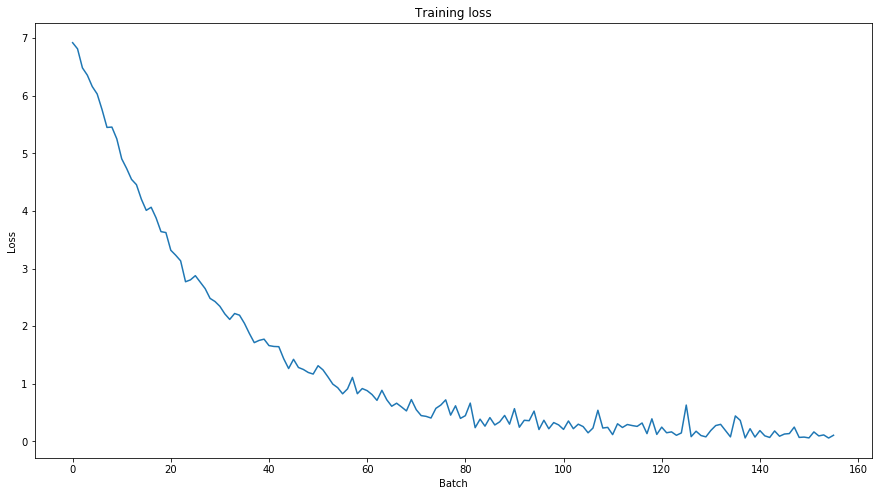

t_total value of -1 results in schedule not being applied
Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Train loss: 4.12500497011038


Epoch:  25%|██▌       | 1/4 [00:20<01:00, 20.16s/it]

Validation Accuracy: 0.1875
Train loss: 1.6079400319319506


Epoch:  50%|█████     | 2/4 [00:40<00:40, 20.15s/it]

Validation Accuracy: 0.6276041666666666
Train loss: 0.7821542391410241


Epoch:  75%|███████▌  | 3/4 [01:00<00:20, 20.18s/it]

Validation Accuracy: 0.6736111111111112
Train loss: 0.3342642184251394


Epoch: 100%|██████████| 4/4 [01:20<00:00, 20.18s/it]

Validation Accuracy: 0.8072916666666666


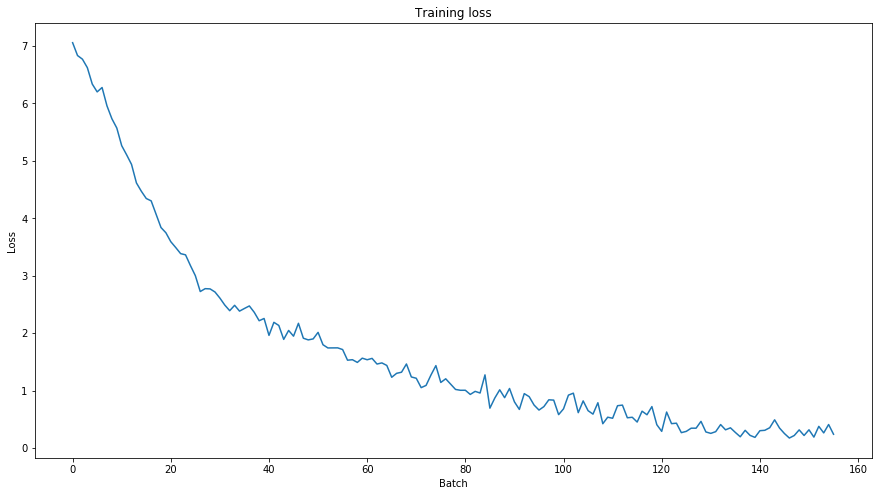

t_total value of -1 results in schedule not being applied
Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Train loss: 4.1297691357441435


Epoch:  25%|██▌       | 1/4 [00:20<01:00, 20.06s/it]

Validation Accuracy: 0.2152777777777778
Train loss: 1.634044899390294


Epoch:  50%|█████     | 2/4 [00:40<00:40, 20.07s/it]

Validation Accuracy: 0.6675347222222222
Train loss: 0.7864200113675534


Epoch:  75%|███████▌  | 3/4 [01:00<00:20, 20.05s/it]

Validation Accuracy: 0.8038194444444444
Train loss: 0.3029096844868782


Epoch: 100%|██████████| 4/4 [01:20<00:00, 20.06s/it]

Validation Accuracy: 0.8550347222222222


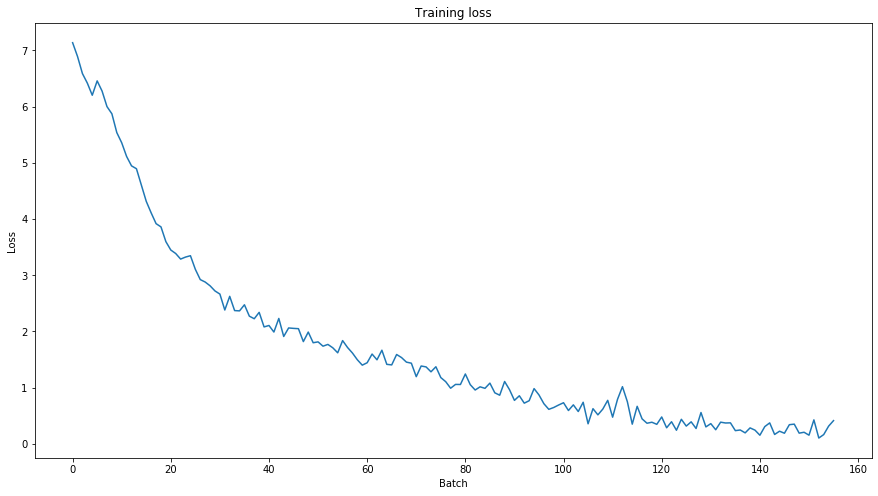

t_total value of -1 results in schedule not being applied
Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Train loss: 4.159790418086907


Epoch:  25%|██▌       | 1/4 [00:20<01:00, 20.25s/it]

Validation Accuracy: 0.3802083333333333
Train loss: 1.4495007762542138


Epoch:  50%|█████     | 2/4 [00:40<00:40, 20.19s/it]

Validation Accuracy: 0.7690972222222222
Train loss: 0.5882413196258056


Epoch:  75%|███████▌  | 3/4 [01:00<00:20, 20.20s/it]

Validation Accuracy: 0.8671875
Train loss: 0.25621373836810774


Epoch: 100%|██████████| 4/4 [01:20<00:00, 20.20s/it]

Validation Accuracy: 0.8515625


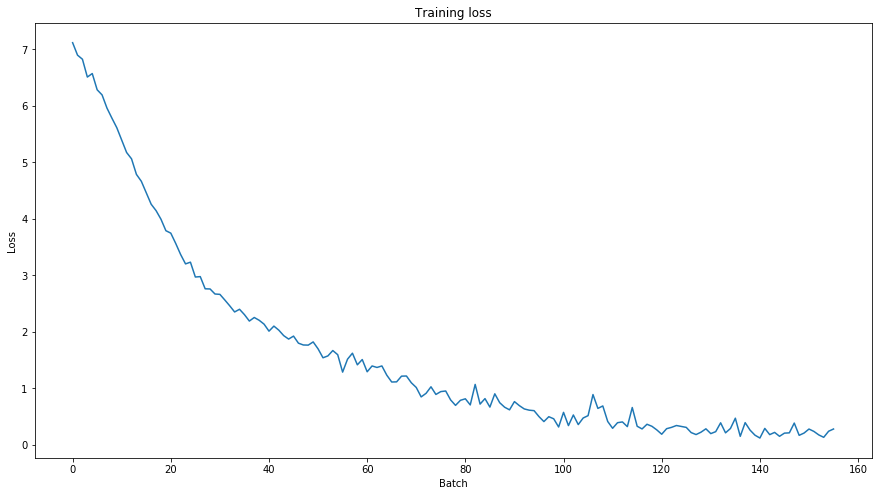

t_total value of -1 results in schedule not being applied
Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Train loss: 3.9991274796999416


Epoch:  25%|██▌       | 1/4 [00:20<01:00, 20.18s/it]

Validation Accuracy: 0.4461805555555556
Train loss: 1.3303667673697839


Epoch:  50%|█████     | 2/4 [00:40<00:40, 20.21s/it]

Validation Accuracy: 0.8550347222222222
Train loss: 0.48802461456029844


Epoch:  75%|███████▌  | 3/4 [01:00<00:20, 20.16s/it]

Validation Accuracy: 0.8862847222222222
Train loss: 0.18456695018670496


Epoch: 100%|██████████| 4/4 [01:20<00:00, 20.21s/it]

Validation Accuracy: 0.9097222222222222


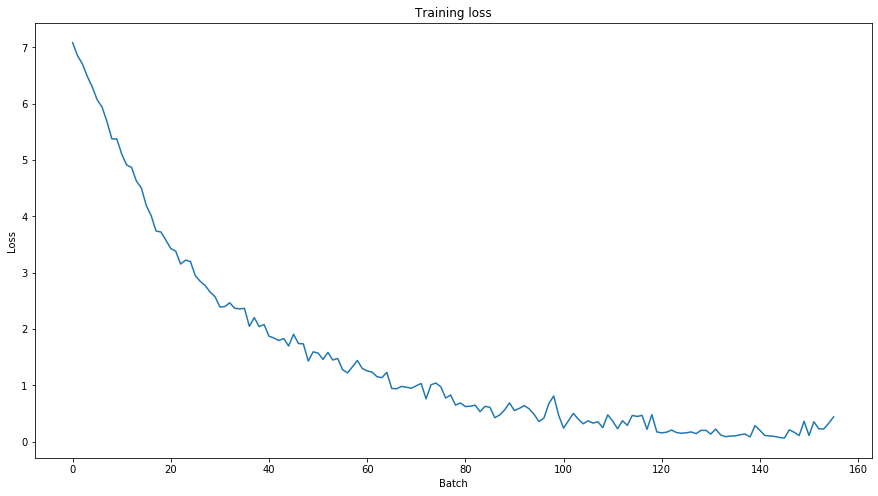

t_total value of -1 results in schedule not being applied
Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Train loss: 4.1681934258876705


Epoch:  25%|██▌       | 1/4 [00:20<01:00, 20.18s/it]

Validation Accuracy: 0.28125
Train loss: 1.6068660051394732


Epoch:  50%|█████     | 2/4 [00:40<00:40, 20.19s/it]

Validation Accuracy: 0.6640625
Train loss: 0.6593202023934095


Epoch:  75%|███████▌  | 3/4 [01:00<00:20, 20.18s/it]

Validation Accuracy: 0.8046875
Train loss: 0.2864164377634342


Epoch: 100%|██████████| 4/4 [01:20<00:00, 20.16s/it]

Validation Accuracy: 0.890625


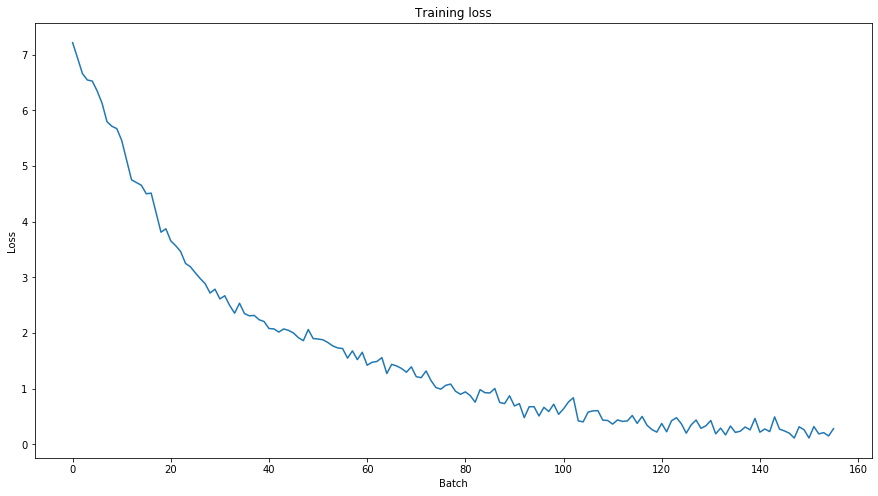

t_total value of -1 results in schedule not being applied
Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Train loss: 4.022573513862414


Epoch:  25%|██▌       | 1/4 [00:20<01:00, 20.20s/it]

Validation Accuracy: 0.3515625
Train loss: 1.3683614226487966


Epoch:  50%|█████     | 2/4 [00:40<00:40, 20.22s/it]

Validation Accuracy: 0.765625
Train loss: 0.47418193175242496


Epoch:  75%|███████▌  | 3/4 [01:00<00:20, 20.19s/it]

Validation Accuracy: 0.875
Train loss: 0.1830027176019473


Epoch: 100%|██████████| 4/4 [01:20<00:00, 20.25s/it]

Validation Accuracy: 0.9140625


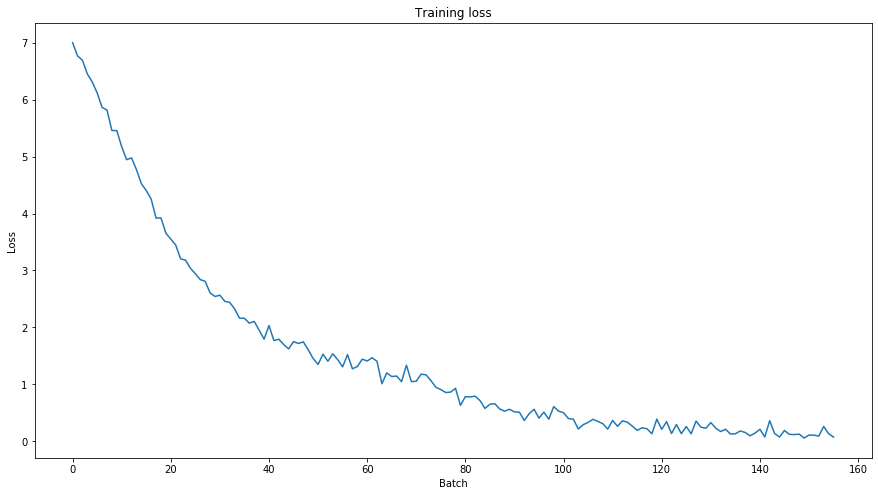

t_total value of -1 results in schedule not being applied
Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Train loss: 4.080660752761058


Epoch:  25%|██▌       | 1/4 [00:20<01:00, 20.12s/it]

Validation Accuracy: 0.21875
Train loss: 1.5493842516189966


Epoch:  50%|█████     | 2/4 [00:40<00:40, 20.11s/it]

Validation Accuracy: 0.7578125
Train loss: 0.6912598059727595


Epoch:  75%|███████▌  | 3/4 [01:00<00:20, 20.14s/it]

Validation Accuracy: 0.8203125
Train loss: 0.3071893319869653


Epoch: 100%|██████████| 4/4 [01:20<00:00, 20.15s/it]

Validation Accuracy: 0.8984375


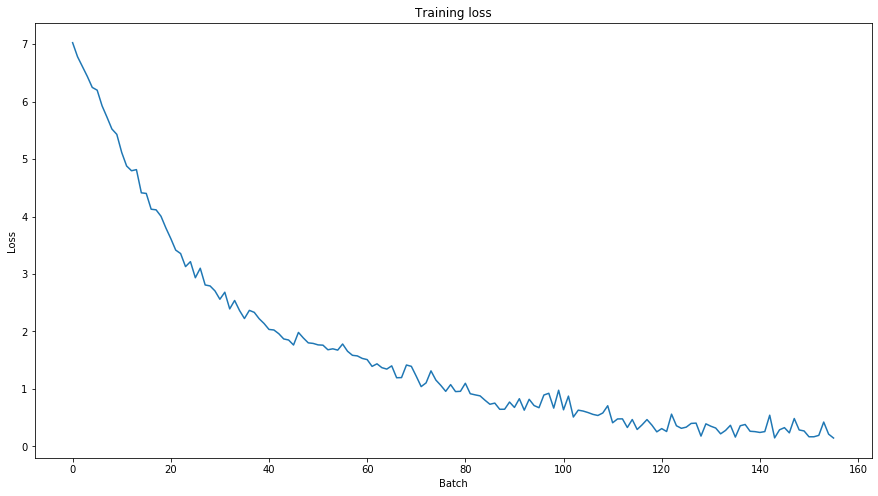

t_total value of -1 results in schedule not being applied
Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Train loss: 4.07184851475251


Epoch:  25%|██▌       | 1/4 [00:20<01:00, 20.13s/it]

Validation Accuracy: 0.1484375
Train loss: 1.725095991904919


Epoch:  50%|█████     | 2/4 [00:40<00:40, 20.13s/it]

Validation Accuracy: 0.65625
Train loss: 0.7654973780497526


Epoch:  75%|███████▌  | 3/4 [01:00<00:20, 20.13s/it]

Validation Accuracy: 0.8203125
Train loss: 0.31983416355573213


Epoch: 100%|██████████| 4/4 [01:20<00:00, 20.14s/it]

Validation Accuracy: 0.78125


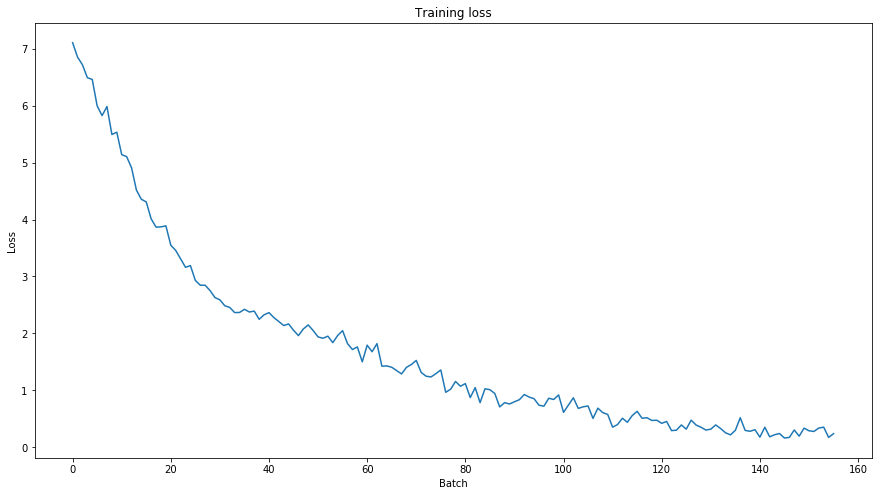

t_total value of -1 results in schedule not being applied
Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Train loss: 4.2922843337059025


Epoch:  25%|██▌       | 1/4 [00:20<01:00, 20.32s/it]

Validation Accuracy: 0.265625
Train loss: 1.6422702923417092


Epoch:  50%|█████     | 2/4 [00:40<00:40, 20.38s/it]

Validation Accuracy: 0.6796875
Train loss: 0.6945697523653507


Epoch:  75%|███████▌  | 3/4 [01:01<00:20, 20.40s/it]

Validation Accuracy: 0.8046875
Train loss: 0.2692791450768709


Epoch: 100%|██████████| 4/4 [01:21<00:00, 20.39s/it]

Validation Accuracy: 0.8203125


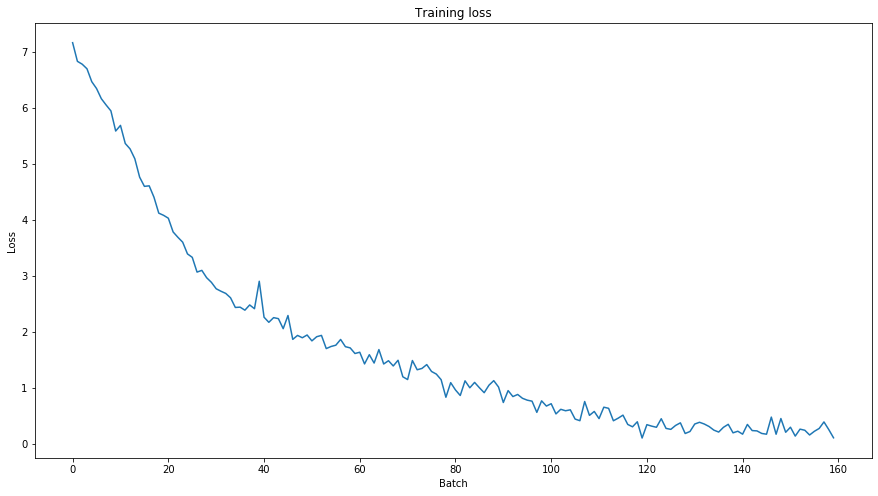

In [ ]:
contador=0
y_pred=[]
y_test=[]
while(contador<len(vetor_X_train)):
    
    query_data_test=vetor_X_test[contador]
    intent_data_label_test=vetor_y_test[contador]
    intent_data_label_test=transform(intent_data_label_test)
    

    X_train=vetor_X_train[contador]
    y_train=vetor_y_train[contador]
    test = np.c_[X_train[:np.newaxis], y_train[:np.newaxis]]
    df = pd.DataFrame(test, columns=['English', 'Tópico'])
    
   # maximum = classe com maior quantidade de problemas(classe majoritaria) = mathematics

    maximum = df.Tópico.value_counts().max()

    # Separação de cada problemas em suas respectivas classes
    g = df.groupby('Tópico')

    ece = g.get_group('Estrutura condicional encadeada')
#     ec=g.get_group('Estrutura condicional')
    vetor = g.get_group('Vetor')
    ves = g.get_group('Variáveis e Estrutura Sequencial')
    ecc = g.get_group('Estrutura condicional composta')
    matrizes = g.get_group('Matrizes')
    ercont = g.get_group('Estrutura de repetição por contagem')
    ercond = g.get_group('Estrutura de repetição por condição')
    strings = g.get_group('Strings')
    ambientacao = g.get_group('Ambientação')
    
    #criação de novas sentenças

    new_ece = get_new_sentences(ece)
    new_vetor = get_new_sentences(vetor)
    new_ves = get_new_sentences(ves)
    new_ecc = get_new_sentences(ecc)
    new_matrizes = get_new_sentences(matrizes)
    new_ercond = get_new_sentences(ercond)
    new_ercont = get_new_sentences(ercont)
    new_strings = get_new_sentences(strings)
    new_ambientacao = get_new_sentences(ambientacao)

    
    #criando dataframe de cada sentença criada

    new_ece = pd.DataFrame(new_ece,columns=['English'])
    new_ece['Tópico'] = 'Estrutura condicional'

    new_vetor = pd.DataFrame(new_vetor,columns=['English'])
    new_vetor['Tópico'] = 'Vetor'

    new_ves = pd.DataFrame(new_ves,columns=['English'])
    new_ves['Tópico'] = 'Variáveis e Estrutura Sequencial'

    new_ecc = pd.DataFrame(new_ecc,columns=['English'])
    new_ecc['Tópico'] = 'Estrutura condicional composta'

    new_matrizes = pd.DataFrame(new_matrizes,columns=['English'])
    new_matrizes['Tópico'] = 'Matrizes'

    new_ercont = pd.DataFrame(new_ercont,columns=['English'])
    new_ercont['Tópico'] = 'Estrutura de repetição por contagem'

    new_ercond = pd.DataFrame(new_ercond,columns=['English'])
    new_ercond['Tópico'] = 'Estrutura de repetição por condição'

    new_strings = pd.DataFrame(new_strings,columns=['English'])
    new_strings['Tópico'] = 'Strings'

    new_ambientacao = pd.DataFrame(new_ambientacao,columns=['English'])
    new_ambientacao['Tópico'] = 'Ambientação'

    ece_extended = pd.concat([ece, new_ece], keys = ['English', 'Tópico'])
    vetor_extended = pd.concat([vetor, new_vetor], keys = ['English', 'Tópico'])
    ves_extended = pd.concat([ves, new_ves], keys = ['English', 'Tópico'])
    ecc_extended = pd.concat([ecc, new_ecc], keys = ['English', 'Tópico'])
    matrizes_extended = pd.concat([matrizes, new_matrizes], keys = ['English', 'Tópico'])
    ercont_extended = pd.concat([ercont, new_ercont], keys = ['English', 'Tópico'])
    ercond_extended = pd.concat([ercond, new_ercond], keys = ['English', 'Tópico'])
    strings_extended = pd.concat([strings, new_strings], keys = ['English', 'Tópico'])
    ambientacao_extended = pd.concat([ambientacao, new_ambientacao], keys = ['English', 'Tópico'])

    #concantenando dataframes de sentenças parafráseadas a base de dados original 
    df = pd.concat([ece_extended,vetor_extended,ves_extended,ecc_extended,
               matrizes_extended,ercont_extended,ercond_extended,strings_extended,ambientacao_extended])
    
    
    X_train = df['English']
    y_train = df['Tópico']
    
    query_data_train=X_train
    labels=y_train
    labels=transform(labels)
   

    sentences = ["[CLS] " + query + " [SEP]" for query in query_data_train]
    sentences2=["[CLS] " + query + " [SEP]" for query in query_data_test]
    
    # Tokenize with BERT tokenizer
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
    tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]

    tokenizer2 = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
    tokenized_texts2 = [tokenizer2.tokenize(sent) for sent in sentences2]
  
    # Set the maximum sequence length. 
    MAX_LEN = 128
    # Pad our input tokens
    train_inputs = pad_sequences([tokenizer.convert_tokens_to_ids(txt) for txt in tokenized_texts],
                              maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
    # Use the BERT tokenizer to convert the tokens to their index numbers in the BERT vocabulary
    train_inputs = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
    train_inputs = pad_sequences(train_inputs, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

    # Pad our input tokens
    validation_inputs = pad_sequences([tokenizer2.convert_tokens_to_ids(txt) for txt in tokenized_texts2],
                              maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
    # Use the BERT tokenizer to convert the tokens to their index numbers in the BERT vocabulary
    validation_inputs = [tokenizer2.convert_tokens_to_ids(x) for x in tokenized_texts2]
    validation_inputs = pad_sequences(validation_inputs, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

    # # Create attention masks
    attention_masks = []
    # Create a mask of 1s for each token followed by 0s for padding
    for seq in train_inputs:
      seq_mask = [float(i>0) for i in seq]
      attention_masks.append(seq_mask)

    attention_masks2 = []
    # Create a mask of 1s for each token followed by 0s for padding
    for seq in validation_inputs:
      seq_mask = [float(i>0) for i in seq]
      attention_masks2.append(seq_mask)


    # # Use train_test_split to split our data into train and validation sets for training
    # train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels,
    #                                                             random_state=2018, test_size=0.1)
    # train_masks, validation_masks, _, _ = train_test_split(attention_masks, input_ids,
    #                                             random_state=2018, test_size=0.1)

    # # Convert all of our data into torch tensors, the required datatype for our model
    train_inputs = torch.tensor(train_inputs)
    validation_inputs = torch.tensor(validation_inputs)
    train_labels = torch.tensor(labels)
    validation_labels = torch.tensor(intent_data_label_test)
    train_masks = torch.tensor(attention_masks)
    validation_masks = torch.tensor(attention_masks2)

    # Select a batch size for training. 
    batch_size = 32

    # Create an iterator of our data with torch DataLoader 
    train_data = TensorDataset(train_inputs, train_masks, train_labels)
    train_sampler = RandomSampler(train_data)
    train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
    validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
    validation_sampler = SequentialSampler(validation_data)
    validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

    model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=y.shape[0])
    model.cuda()

    # BERT fine-tuning parameters
    param_optimizer = list(model.named_parameters())
    no_decay = ['bias', 'gamma', 'beta']
    optimizer_grouped_parameters = [
        {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
        'weight_decay_rate': 0.01},
        {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
        'weight_decay_rate': 0.0}
    ]

    optimizer = BertAdam(optimizer_grouped_parameters,
                        lr=2e-5,
                        warmup=.1)

      
    # Store our loss and accuracy for plotting
    train_loss_set = []
    # Number of training epochs 
    epochs = 4

    # BERT training loop
    for _ in trange(epochs, desc="Epoch"):  
      
      ## TRAINING
      
      # Set our model to training mode
      model.train()  
      # Tracking variables
      tr_loss = 0
      nb_tr_examples, nb_tr_steps = 0, 0
      # Train the data for one epoch
      for step, batch in enumerate(train_dataloader):
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        # Clear out the gradients (by default they accumulate)
        optimizer.zero_grad()
        # Forward pass
        loss = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
        train_loss_set.append(loss.item())    
        # Backward pass
        loss.backward()
        # Update parameters and take a step using the computed gradient
        optimizer.step()
        # Update tracking variables
        tr_loss += loss.item()
        nb_tr_examples += b_input_ids.size(0)
        nb_tr_steps += 1
      print("Train loss: {}".format(tr_loss/nb_tr_steps))
          
      ## VALIDATION

      # Put model in evaluation mode
      model.eval()
      # Tracking variables 
      eval_loss, eval_accuracy = 0, 0
      nb_eval_steps, nb_eval_examples = 0, 0
      # Evaluate data for one epoch
      for batch in validation_dataloader:
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        # Telling the model not to compute or store gradients, saving memory and speeding up validation
        with torch.no_grad():
          # Forward pass, calculate logit predictions
          logits = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)    
        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)    
        eval_accuracy += tmp_eval_accuracy
        nb_eval_steps += 1
      print("Validation Accuracy: {}".format(eval_accuracy/nb_eval_steps))

    # plot training performance
    plt.figure(figsize=(15,8))
    plt.title("Training loss")
    plt.xlabel("Batch")
    plt.ylabel("Loss")
    plt.plot(train_loss_set)
    plt.show()

    # load test data
    sentences = ["[CLS] " + query + " [SEP]" for query in query_data_test]
    labels = intent_data_label_test

    # tokenize test data
    tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]
    MAX_LEN = 128
    # Pad our input tokens
    input_ids = pad_sequences([tokenizer.convert_tokens_to_ids(txt) for txt in tokenized_texts],
                              maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
    # Use the BERT tokenizer to convert the tokens to their index numbers in the BERT vocabulary
    input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
    input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
    # Create attention masks
    attention_masks = []
    # Create a mask of 1s for each token followed by 0s for padding
    for seq in input_ids:
      seq_mask = [float(i>0) for i in seq]
      attention_masks.append(seq_mask) 

    # create test tensors
    prediction_inputs = torch.tensor(input_ids)
    prediction_masks = torch.tensor(attention_masks)
    prediction_labels = torch.tensor(labels)
    batch_size = 32  
    prediction_data = TensorDataset(prediction_inputs, prediction_masks, prediction_labels)
    prediction_sampler = SequentialSampler(prediction_data)
    prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

    ## Prediction on test set
    # Put model in evaluation mode
    model.eval()
    # Tracking variables 
    predictions , true_labels = [], []
    # Predict 
    for batch in prediction_dataloader:
      # Add batch to GPU
      batch = tuple(t.to(device) for t in batch)
      # Unpack the inputs from our dataloader
      b_input_ids, b_input_mask, b_labels = batch
      # Telling the model not to compute or store gradients, saving memory and speeding up prediction
      with torch.no_grad():
        # Forward pass, calculate logit predictions
        logits = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
      # Move logits and labels to CPU
      logits = logits.detach().cpu().numpy()
      label_ids = b_labels.to('cpu').numpy()  
      # Store predictions and true labels
      predictions.append(logits)
      true_labels.append(label_ids)
      
    # Import and evaluate each test batch using Matthew's correlation coefficient
    from sklearn.metrics import matthews_corrcoef
    matthews_set = []
    for i in range(len(true_labels)):
      matthews = matthews_corrcoef(true_labels[i],
                    np.argmax(predictions[i], axis=1).flatten())
      matthews_set.append(matthews)
      
    # Flatten the predictions and true values for aggregate Matthew's evaluation on the whole dataset
    flat_predictions = [item for sublist in predictions for item in sublist]
    flat_predictions = np.argmax(flat_predictions, axis=1).flatten()
    flat_true_labels = [item for sublist in true_labels for item in sublist]

    y_pred+=[flat_predictions]
    y_test+=[flat_true_labels]
        


    contador+=1

In [ ]:
aux=[]
for elemento in y_pred:
  for cada in elemento:
    aux+=[cada]
y_pred=aux

In [ ]:
aux=[]
for elemento in y_test:
  for cada in elemento:
    aux+=[cada]
y_test=aux

In [ ]:
y_pred=reverseTransform(y_pred)
y_test=reverseTransform(y_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))#, target_names=target_names))

                                     precision    recall  f1-score   support

                        Ambientação       0.86      0.63      0.73        19
     Estrutura condicional composta       0.74      0.76      0.75       136
    Estrutura condicional encadeada       0.87      0.88      0.87       161
Estrutura de repetição por condição       0.84      0.85      0.85       114
Estrutura de repetição por contagem       0.80      0.74      0.77       117
                           Matrizes       0.99      0.97      0.98       134
                            Strings       0.83      0.83      0.83        47
   Variáveis e Estrutura Sequencial       0.83      0.83      0.83       157
                              Vetor       0.88      0.93      0.91       160

                           accuracy                           0.85      1045
                          macro avg       0.85      0.83      0.84      1045
                       weighted avg       0.85      0.85      0.85      10

In [ ]:
accuracy_score(y_test, y_pred)

0.8516746411483254